
```
EDA file này: src\processed_data\processed_data_example_v4_15000Data.xlsx

robot	user_answer	user_intent
Được rồi, bây giờ chúng ta sẽ chơi một trò chơi! Hãy kể tên nhiều từ thuộc cùng 1 chủ đề nhé. Chủ đề lần này là hành động bắt đầu bằng từ "eat food". Tớ ví dụ nhé, "eat pizza", đến lượt cậu nhé	Tớ ăn cơm.	intent_positive
Tốt lắm! Cậu có thể kể thêm từ nào khác không?	Tớ ăn bánh mì.	intent_positive
Cậu có biết thêm từ nào khác không?	Tớ không biết nữa.	intent_negative
Không sao! Cậu có muốn thử lại không?	Tớ không muốn chơi nữa.	intent_negative
Cậu có thể cho tớ biết thêm từ nào không?	Tớ chưa nghĩ ra.	intent_neutral
Cậu có muốn thử một chủ đề khác không?	Tớ không biết.	intent_neutral
Cậu có muốn tìm hiểu thêm về các món ăn không?	Có, tớ muốn biết thêm.	intent_learn_more
Tuyệt vời! Cậu muốn biết về món ăn nào?	Tớ muốn biết về pizza.	intent_learn_more
Cậu có biết ăn uống lành mạnh là gì không?	Tớ không thích nói về điều đó.	intent_fallback
Cậu có biết ăn uống lành mạnh là gì không?	Tớ không muốn trả lời.	intent_fallback
Cậu có muốn tiếp tục không?		silence
Cậu có muốn chơi tiếp không?		silence
Được rồi, bây giờ chúng ta sẽ chơi một trò chơi! Hãy kể tên nhiều từ thuộc cùng 1 chủ đề nhé. Chủ đề lần này là hành động bắt đầu bằng từ "Drink water". Tớ ví dụ nhé, "drink water", đến lượt cậu nhé!	Tớ có thể nói "drink juice".	intent_positive
Tốt lắm! Cậu có từ nào khác không?	Tớ không biết nữa.	intent_negative
Không sao, cậu có thể nghĩ thêm không? Chủ đề là "Drink water".	Tớ chưa nghĩ ra từ nào khác.	intent_neutral
Cậu có thể thử nghĩ thêm một số từ khác không? Ví dụ như "drink soda".	Tớ muốn tìm hiểu thêm về các loại đồ uống.	intent_learn_more
Cậu có biết từ nào khác không? Hãy thử nhé!	Tớ không thích trò chơi này.	intent_negative
Cậu có thể nói một từ khác không? Hãy thử nhé!		silence
Cậu có thể kể tên một số đồ uống không? Ví dụ như "drink tea".	Tớ biết "drink milk".	intent_positive
Rất tốt! Cậu có từ nào khác không?	Tớ không biết thêm từ nào nữa.	intent_negative
Cậu có thể nghĩ thêm không? Chủ đề là "Drink water".	Tớ không chắc lắm.	intent_neutral
Cậu có thể thử nghĩ thêm một số từ khác không? Ví dụ như "drink lemonade".	Tớ muốn biết thêm về các loại nước uống.	intent_learn_more
Cậu có biết từ nào khác không? Hãy thử nhé!	Tớ không muốn chơi nữa.	intent_negative
Cậu có thể kể tên một số đồ uống không? Ví dụ như "drink coffee".		silence
Được rồi, bây giờ chúng ta sẽ chơi một trò chơi! Hãy kể tên nhiều từ thuộc cùng 1 chủ đề nhé. Chủ đề lần này là hành động bắt đầu bằng từ 'play'. Tớ ví dụ nhé, 'play football', đến lượt cậu nhé!	Tớ có thể nói 'play basketball'.	intent_positive


----
Xem số lượng các nhãn

```


Phân phối các nhãn:
intent_negative: 3187 (20.31%)
intent_positive: 2769 (17.64%)
intent_neutral: 2752 (17.54%)
silence: 2620 (16.69%)
intent_learn_more: 2531 (16.13%)
intent_fallback: 1835 (11.69%)


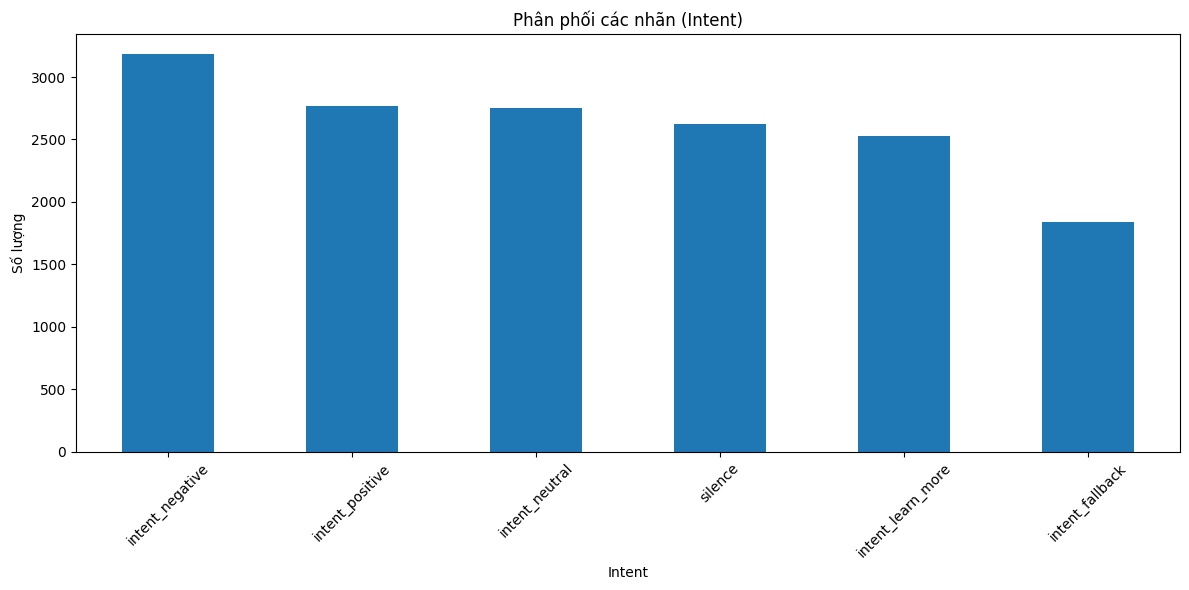

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc file Excel
df = pd.read_excel("processed_data_example_v4_15000Data.xlsx")

# Đếm số lượng mỗi intent
intent_counts = df['user_intent'].value_counts()

print("\nPhân phối các nhãn:")
print("===================")
for intent, count in intent_counts.items():
    print(f"{intent}: {count} ({(count/len(df)*100):.2f}%)")

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
intent_counts.plot(kind='bar')
plt.title('Phân phối các nhãn (Intent)')
plt.xlabel('Intent')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Với bộ data này thì hôm thứ 5, em train với 10 epochs XLM-RoBERTa thì Acc đã từ 49 % lên 79% (cho tập Test riêng biệt hôm nọ) ạ

Report hôm trước 
```
[OVERFITTING Report]: Em gửi report phần model hiện tại ạ.


Dataset: 15000 bộ: robot - user_answer - user_intent. 
Cách tạo: 500 cụm từ * 3 dạng bài * 12 Turn (1 conversation: robot - user_answer_intent) = 15000 dòng data.

2. Model: BERT, 450MB,
Accuracy trên 500 dòng data đã train: 90%
Accuracy trên 5000 dòng data đã train: 86.67%
Accuracy (đánh giá trên 600 dòng mới toanh) Acc: 46.67%

3. Train: 100 epochs, so sánh các best_eval (epoch30, 80, ...)
----
Link: https://docs.google.com/spreadsheets/d/1yh_b0XCiyAgaqpeez9GO9jJnaDsiEdg3w6SgZ5U8-1g/edit?usp=sharing
----

-------
Model Overfititng,
Dự đoán nguyên nhân:

1.  Overfitting do tập train quá ít đa dạng:
- 15,000 dòng data từ 500 cụm từ (gốc) => mô hình "học thuộc" hơn là "học cách tổng quát".  
- Trong khi đó bộ test được tạo từ 50 cụm mới. 

2. 
3. 
Hướng cải thiện:
Sử dụng 1 model tốt hơn, có thể là: XLM-R (XLM-RoBERTa); Kết hợp PhoBERT + BERTweet
Đa dạng các cụm tiếng anh hơn là chỉ 500 cụm gen tới 15000 bộ question-answer. 

====

anh @cuongvc, anh @Đinh Hùng, anh @Minh Hoang Duc
---
a @Đinh Hùng ơi SOS Ạ.!!!
```

Nói về report hôm trước, bị thấp 49%. 
- Nguyên nhân phần lớn đến từ việc KHÔNG CÓ TIẾNG VIỆT của BERT. 

Dưới đây là một số nhận định và góp ý dựa trên report mà em trình bày:

---

### 1. Tóm tắt báo cáo và thực nghiệm
- **Dataset:**  
  - Tổng số dòng: 15.000 (được tạo từ 500 cụm từ gốc, mỗi cụm 3 dạng bài với 12 turn hội thoại).  
  - Cấu trúc: robot – user_answer – user_intent.
  
- **Báo cáo phân phối nhãn:**  
  - Sử dụng đoạn code Python để đọc file Excel, đếm số lượng các nhãn và vẽ biểu đồ phân phối intent. Điều này giúp kiểm tra xem data có độ chênh lệch hay mất cân bằng nhãn nào không.

- **Thực nghiệm ban đầu với model BERT:**  
  - Đã có báo cáo về việc overfitting khi dùng model BERT (kích thước ~450MB).  
  - Kết quả thực nghiệm:
    - Accuracy trên tập train 500 dòng: ~90%  
    - Accuracy trên tập train 5000 dòng: ~86.67%
    - Accuracy trên tập test (600 dòng mới hoàn toàn): chỉ 46.67%
  - Quá trình train với 100 epochs (với best_eval tại các epoch như 30, 80, …) cho thấy có hiện tượng overfitting.

- **Kết quả về XLM-RoBERTa:**  
  - Hôm thứ 5, với 10 epochs train XLM-RoBERTa, accuracy tập Test đã tăng từ 49% lên 79% (dùng dữ liệu test riêng biệt).

---

### 2. Phân tích nguyên nhân và nhận định
- **Nguyên nhân chính của vấn đề overfitting:**
  1. **Đa dạng dữ liệu hạn chế:**  
     - Dataset chỉ gồm 15.000 dòng, được tạo từ 500 cụm từ gốc. Điều này có thể khiến model “học thuộc” dữ liệu thay vì học được khả năng tổng quát hóa.
     - Trong khi đó, bộ test được tạo từ 50 cụm mới, có cấu trúc hoặc từ vựng khác biệt so với dữ liệu train, dẫn đến kết quả dự đoán kém.
  
  2. **Vấn đề về ngôn ngữ:**  
     - Báo cáo đã chỉ ra phần lớn nguyên nhân của việc accuracy thấp (49% ban đầu) là do **BERT không có tiếng Việt**.  
       Điều này làm giảm hiệu quả của mô hình khi xử lý các văn bản có pha trộn tiếng Việt (với cả tiếng Anh) hoặc các đặc trưng ngôn ngữ đặc thù.
       
- **Một vài điểm cần lưu ý bổ sung:**
  - **Chọn model:**  
    - Các hướng cải thiện là dùng model đa ngôn ngữ tốt hơn như **XLM-RoBERTa**.
    - Kết hợp các mô hình tiền huấn luyện từ PhoBERT (cho tiếng Việt) và BERTweet (cho tiếng Anh) có thể là giải pháp cải thiện khả năng tổng quát trên dữ liệu đa ngôn ngữ.
  - **Cải thiện dataset:**  
    - Tăng đa dạng các cụm từ tiếng Anh (và các ngôn ngữ khác nếu có) để tránh việc mô hình học “in mẫu” dữ liệu cố định.
    - Có thể xem xét việc mở rộng dataset không chỉ bằng cách tăng số lượng dòng mà còn làm giàu nội dung hội thoại, tình huống, từ ngữ và ngữ cảnh.

---

### 3. Góp ý và các bước tiếp theo

1. **Sử dụng mô hình XLM-RoBERTa:**  
   - Như kết quả thực nghiệm cho thấy, với 10 epochs của XLM-RoBERTa mà accuracy tăng lên 79%, cho thấy mô hình này phù hợp hơn trong bối cảnh dữ liệu có chứa tiếng Việt và tiếng Anh.

2. **Tăng cường dữ liệu (Data Augmentation):**  
   - Cân nhắc việc bổ sung dữ liệu từ các nguồn khác, hoặc tạo ra thêm các cụm từ mới, các kiểu giao tiếp đa dạng để mô hình không học “in mẫu”.
   
3. **Kết hợp mô hình:**  
   - Với khả năng của PhoBERT (cho tiếng Việt) và BERTweet (cho tiếng Anh), có thể cân nhắc xây dựng một hệ thống ensemble hoặc mô hình lai (hybrid model) để cải thiện khả năng xử lý song ngữ.

4. **Kiểm soát quá trình training:**  
   - Xem xét giảm số epoch, áp dụng kỹ thuật regularization (như dropout, weight decay) để giảm hiện tượng overfitting.

5. **Đánh giá trên tập data cân đối:**  
   - Đảm bảo rằng tập kiểm thử (test set) phải phản ánh đủ tính đa dạng và ngữ cảnh mà mô hình sẽ gặp phải trong thực tế.

---

### Kết luận

Báo cáo ban đầu cho thấy điểm mạnh khi chuyển sang sử dụng XLM-RoBERTa, nhưng nguyên nhân chính của accuracy thấp ban đầu là do:
- **Overfitting** do dữ liệu đào tạo không đủ đa dạng (chỉ dựa trên 500 cụm từ gốc).
- **Thiếu hỗ trợ tiếng Việt** trong mô hình BERT ban đầu.

Do đó, hướng cải thiện hợp lý là sử dụng mô hình đa ngôn ngữ như XLM-RoBERTa, tăng cường dữ liệu đa dạng và có thể kết hợp các mô hình chuyên biệt cho từng ngôn ngữ. Điều này sẽ giúp mô hình tổng quát hóa tốt hơn và đạt hiệu quả thực tế cao hơn.

Trong lập trình, cả **stage** và **sprint** đều là các thuật ngữ phổ biến, nhưng chúng mang ý nghĩa và được sử dụng trong những ngữ cảnh khác nhau:

---

### 1. **Stage**:
- **Ý nghĩa**: Giai đoạn cụ thể trong một quy trình phát triển phần mềm.  
- **Sử dụng**: Thường được dùng để mô tả một **bước lớn hoặc pha** trong vòng đời phát triển phần mềm (Software Development Life Cycle - SDLC).
- **Ví dụ về các stage trong SDLC**:
  1. **Requirement Analysis** (Phân tích yêu cầu)
  2. **Design** (Thiết kế)
  3. **Implementation** (Triển khai/mã hóa)
  4. **Testing** (Kiểm thử)
  5. **Deployment** (Triển khai)
  6. **Maintenance** (Bảo trì)

- **Mô hình sử dụng stage phổ biến**:
  - **Waterfall Model (Mô hình thác nước)**: Các stage được thực hiện tuần tự.
  - **Agile Model (Mô hình linh hoạt)**: Các stage có thể xảy ra lặp lại hoặc đồng thời.

---

### 2. **Sprint**:
- **Ý nghĩa**: Một đơn vị thời gian ngắn, cố định (thường từ 1-4 tuần), được dùng trong **Agile/Scrum** để hoàn thành một phần công việc cụ thể của dự án.
- **Sử dụng**:  
  - Dùng trong phương pháp **Scrum** hoặc các phương pháp Agile khác để quản lý dự án.
  - Một sprint bao gồm:
    1. **Planning (Lên kế hoạch)**: Xác định mục tiêu và các công việc cần hoàn thành trong sprint.
    2. **Development (Phát triển)**: Lập trình, viết code, kiểm thử.
    3. **Review (Đánh giá)**: Đánh giá kết quả công việc đã hoàn thành.
    4. **Retrospective (Rút kinh nghiệm)**: Nhìn lại sprint để cải thiện trong các sprint tiếp theo.
- **Mục tiêu của Sprint**:  
  Hoàn thành một phần **có thể hoạt động được (shippable product increment)** của sản phẩm.

---

### 3. **So sánh Stage và Sprint**:
| **Tiêu chí**             | **Stage**                                      | **Sprint**                              |
|--------------------------|-----------------------------------------------|----------------------------------------|
| **Ngữ cảnh sử dụng**      | Quy trình phát triển phần mềm (SDLC)          | Scrum hoặc các phương pháp Agile       |
| **Định nghĩa**            | Giai đoạn lớn trong vòng đời phát triển       | Chu kỳ làm việc ngắn, cố định          |
| **Thời gian**             | Có thể kéo dài nhiều tháng hoặc năm           | Ngắn (1-4 tuần)                        |
| **Mục tiêu**              | Hoàn thành một pha lớn của dự án              | Hoàn thành một phần nhỏ của sản phẩm   |
| **Độ linh hoạt**          | Thường cứng nhắc (tuần tự) hoặc đồng thời     | Linh hoạt, có thể thay đổi theo từng sprint |

---

### **Khi nào nên dùng Stage hay Sprint?**
- Nếu dự án của bạn dùng **phương pháp truyền thống (Waterfall)** → Dùng **stage** để chia giai đoạn.  
- Nếu dự án của bạn dùng **phương pháp Agile/Scrum** → Dùng **sprint** để chia nhỏ công việc theo chu kỳ ngắn.  

---

**Tóm lại:**  
- **Stage** là **giai đoạn lớn** trong quy trình phát triển phần mềm.  
- **Sprint** là **chu kỳ ngắn** trong Agile, tập trung vào việc hoàn thành một phần nhỏ và khả thi của sản phẩm.  

Cách sử dụng phụ thuộc vào phương pháp quản lý dự án bạn áp dụng!


Phân phối các nhãn:
intent_negative: 5073 (19.16%)
intent_positive: 4971 (18.77%)
intent_neutral: 4886 (18.45%)
intent_learn_more: 4394 (16.59%)
silence: 4109 (15.52%)
intent_fallback: 3031 (11.45%)


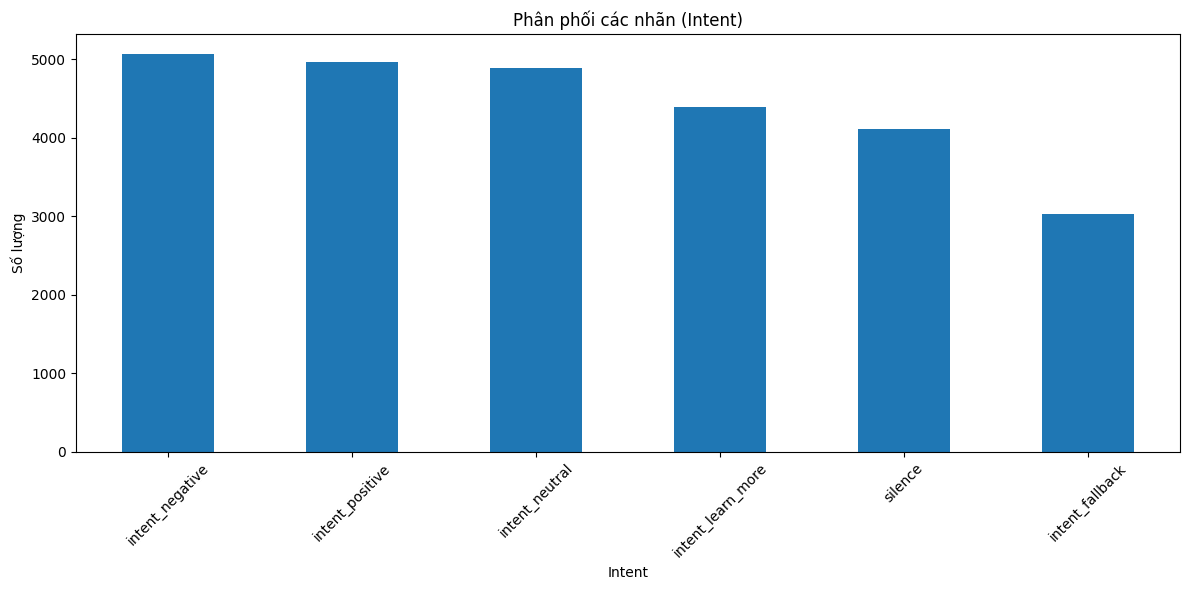

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc file Excel
df = pd.read_excel("processed_data_example_v5_30000Data_addNewDang123.xlsx")

# Đếm số lượng mỗi intent
intent_counts = df['user_intent'].value_counts()

print("\nPhân phối các nhãn:")
print("===================")
for intent, count in intent_counts.items():
    print(f"{intent}: {count} ({(count/len(df)*100):.2f}%)")

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
intent_counts.plot(kind='bar')
plt.title('Phân phối các nhãn (Intent)')
plt.xlabel('Intent')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd

# Đọc file Excel
df = pd.read_excel("processed_data_example_v4_15000Data.xlsx")

# In ra tất cả các giá trị unique trong cột user_intent
print("Các giá trị unique trong cột user_intent:")
print(df['user_intent'].unique())

# Đếm số lượng của mỗi intent và hiển thị đầy đủ
print("\nSố lượng chi tiết của mỗi intent:")
print(df['user_intent'].value_counts(dropna=False))

# Kiểm tra các dòng có giá trị null hoặc trống
print("\nCác dòng có user_intent trống hoặc null:")
print(df[df['user_intent'].isna() | (df['user_intent'] == '')][['robot', 'user_answer', 'user_intent']])

Các giá trị unique trong cột user_intent:
['intent_positive' 'intent_negative' 'intent_neutral' 'intent_learn_more'
 'intent_fallback' 'silence']

Số lượng chi tiết của mỗi intent:
user_intent
intent_negative      3187
intent_positive      2769
intent_neutral       2752
silence              2620
intent_learn_more    2531
intent_fallback      1835
Name: count, dtype: int64

Các dòng có user_intent trống hoặc null:
Empty DataFrame
Columns: [robot, user_answer, user_intent]
Index: []
